# 1 - Perkenalan

Nama : Bagus Tirta Aji Hakim

Batch : FTDS-018-RMT

Dataset : [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

Objective : Membuat model klasifikasi untuk memprediksi apakah pelanggan transportasi udara (Airlane) termasuk kategori puas atau netral tidak puas dengan mengurangi kesalahan prediksi pada pelanggan yang terprediksi puas namun kenyatannya tidak puas atau biasa saja, hal ini merujuk pada evaluasi model yang bernama precision


Field Name  | Description
------------- | -------------
`Gender` | Gender of the passengers (Female, Male)
`Customer` | Type The customer type (Loyal customer, disloyal customer)
`Age` | The actual age of the passengers
`Type of Travel` | Purpose of the flight of the passengers (Personal Travel, Business Travel)
`Class` | Travel class in the plane of the passengers (Business, Eco, Eco Plus)
`Flight distance` | The flight distance of this journey
`Inflight wifi service` | Satisfaction level of the inflight wifi service (0Not Applicable;1-5)
`Departure/Arrival time convenient` | Satisfaction level of Departure/Arrival time convenient
`Ease of Online booking` | Satisfaction level of online booking
`Gate location` | Satisfaction level of Gate location
`Food and drink` | Satisfaction level of Food and drink
`Online boarding` | Satisfaction level of online boarding
`Seat comfort` | Satisfaction level of Seat comfort
`Inflight entertainment` | Satisfaction level of inflight entertainment
`On-board service` | Satisfaction level of On-board service
`Leg room service` | Satisfaction level of Leg room service
`Baggage handling` | Satisfaction level of baggage handling
`Check-in service` | Satisfaction level of Check-in service
`Inflight service` | Satisfaction level of inflight service
`Cleanliness` | Satisfaction level of Cleanliness
`Departure Delay in Minutes` | Minutes delayed when departure
`Arrival Delay in Minutes` | Minutes delayed when Arrival
`Satisfaction` | Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

# 2 - Import Libraries

In [240]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 3 - Data Loading

In [241]:
# Load Dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [242]:
train_copy = train.copy()
test_copy = test.copy()

In [243]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [244]:
train.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [245]:
print('Size of data train: ', train.shape)
print('Size of data test: ', test.shape)

Size of data train:  (103904, 25)
Size of data test:  (25976, 25)


In [246]:
# Check Dataset - 1

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

berdasarkan info dataset yang diperoleh dapat dilihat bahwa tipe data yang tertera sudah sesuai dengan data aslinya terdapat missing values pada variabel `Arrival Delay in Minutes`.

In [247]:
# Check Dataset - 2

train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


> dropping unesscary column

In [248]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [249]:
train = train.drop(columns=['Unnamed: 0', 'id'])
test = test.drop(columns=['Unnamed: 0', 'id'])

mengambil beberapa jumlah data saja, karena data yang terlalu besar dapat memperlambat kinerja model

In [250]:
train = train.iloc[1:25001]
test = test.iloc[1:5001]

# 4 - Exploratory Data Analysis (EDA)

In [251]:
train.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3288
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            314
Arrival Delay in Minutes              322
satisfaction                            2
dtype: int64

In [252]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Berdasarkan pengecekan unique values dapat disimpulkan sebagai berikut:

1. Unique Columns: `Unnamed: 0`, `id`
2. Numeric Columns: `Age`, `Flight Distance`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`
3. Target: `satisfaction`
4. Categoric Columns: Selain dari kolom yang telah disebutkan di atas

Dari categoric columns, dapat dibagi menjadi dua tipe data categoric yaitu

1. Ordinal: `Inflight wifi service`,
       `Departure/Arrival time convenient`, `Ease of Online booking`,
       `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`,
       `Inflight entertainment`, `On-board service`, `Leg room service`,
       `Baggage handling`, `Checkin service`, `Inflight service`,
       `Cleanliness`
2. Nominal: 'Gender', 'Customer Type', 'Type of Travel', 'Class'

## Distribusi Data

In [253]:
numeric = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_num = train[numeric]

In [254]:
normal = []
not_normal = []


def getDataDistribution(df, column):
    stat, p = shapiro(df[column])

    # hasil uji normalitas
    alpha = 0.05
    if p > alpha:
        normal.append((column))
        # print("Data terdistribusi normal")
    else:
        not_normal.append((column))
        # print("Data tidak terdistribusi normal")

In [255]:
for column in train_num:
    getDataDistribution(train_num, column)

print(normal)
print(not_normal)

['Arrival Delay in Minutes']
['Age', 'Flight Distance', 'Departure Delay in Minutes']


**Kesimpulan EDA Sederhana**

1. Dataset didominasi oleh data categoric ordinal
2. Berdasarkan uji normalitas shapiro test, didapatkan terdapat kolom munerik yang terdistribusi normal yaitu kolom `Arrival Delay in Minutes` dan tidak terdistribusi normal yaitu kolom `Age`, `Flight Distance`, `Departure Delay in Minutes`

# 5 - Feature Engineering

## Split between `X` (Features) and `y` (Target)

In [256]:
X_train = train.drop(columns=['satisfaction'])
X_test = test.drop(columns=['satisfaction'])

y_train = train[['satisfaction']]
y_test = test[['satisfaction']]

print('Train size', X_train.shape)
print('Test size', X_test.shape)

Train size (25000, 22)
Test size (5000, 22)


## Mapping

mengubah data kategorik pada target menjadi binary

In [257]:
y_train = y_train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied':0})
y_test = y_test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied':0})

## Split Numerical and Categorical

In [258]:
# mengambil data berdasarkan jenis datanya, yaitu numerik dan categoric

num_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cat_ordinal = train.loc[:,'Inflight wifi service':'Cleanliness'].columns.to_list()
cat_nominal = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

print('Numeric Columns : ', num_columns)
print('Ordinal Columns : ', cat_ordinal)
print('Nominal Columns : ', cat_nominal)

Numeric Columns :  ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Ordinal Columns :  ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
Nominal Columns :  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [259]:
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat_ord = X_train[cat_ordinal]
X_test_cat_ord = X_test[cat_ordinal]

X_train_cat_nom = X_train[cat_nominal]
X_test_cat_nom = X_test[cat_nominal]

## Handling Outlier

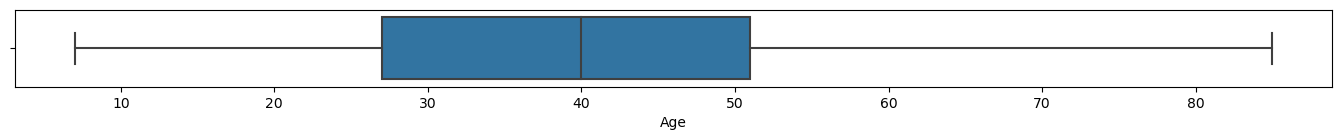

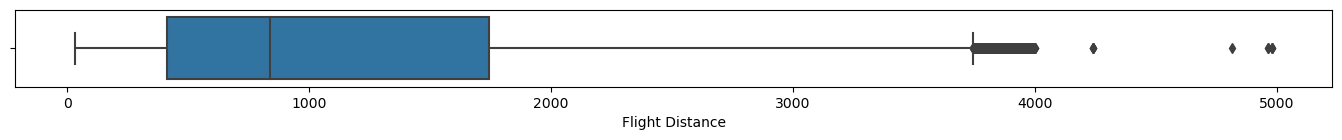

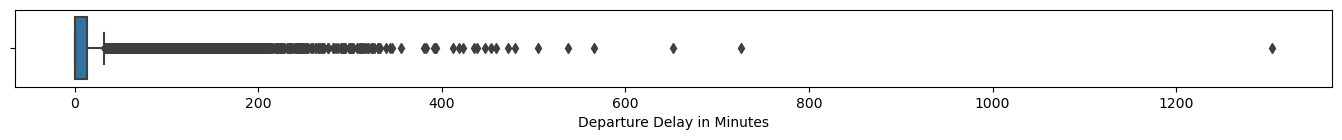

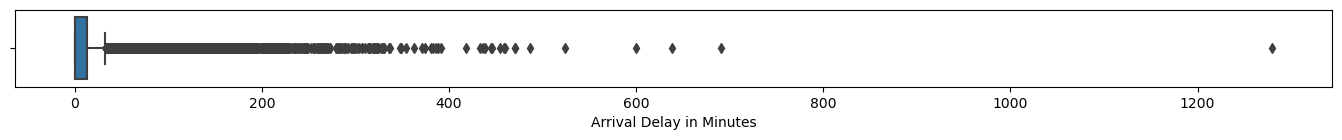

In [260]:
for column in X_train_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_num, x=column)

Berdasarkan pengecekan outlier menggunakan boxplot, terdapat data outlier pada kolom `Flight Distance`, `Derparture Delay in Minutes` dan `Arrival Delay in Minutes`. Namun peneliti memutuskan untuk tidak melakukan handling pada outlier, hal ini dikarenakan sifat outlier yang normal yaitu delay dari suatu penerbanangan baik untuk departure dan arrival tentunya sangat beragam, ada yang delay sangat lama dan ada yang tidak terlalu lama bergantung pada kondisi di daerah tersebut.

In [261]:
high_distance = train[train['Flight Distance'] > 3600]
high_distance.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,844,844,844,844,844
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,satisfied
freq,438,842,835,832,657


 Handling outlier juga tidak dilakukan pada kolom `Flight Distance` dikarenakan jarak penerbangan yang jauh juga hal yang wajar, tergantung dari tipe kelas penerbangan yang digunakan. Berdasarkan analisa, pesawat yang yang melakukan penerbangan jarak jauh merupakan pesawat yang class-nya Business

## Handling Missing Values

In [262]:
total_missing = X_train_num.isna().sum()
percent_missing = (X_train_num.isnull().sum() / len(X_train_num)) * 100
missing_value_X_train_num = pd.DataFrame({'Total Missing': total_missing,
                                          'Missing on percent': percent_missing})

missing_value_X_train_num

,Total Missing,Missing on percent
Age,0,0.000
Flight Distance,0,0.000
Departure Delay in Minutes,0,0.000
Arrival Delay in Minutes,62,0.248


In [263]:
total_missing = X_test_num.isna().sum()
percent_missing = (X_test_num.isnull().sum() / len(X_test_num)) * 100
missing_value_X_test_num = pd.DataFrame({'Total Missing': total_missing,
                                          'Missing on percent': percent_missing})

missing_value_X_test_num

,Total Missing,Missing on percent
Age,0,0.00
Flight Distance,0,0.00
Departure Delay in Minutes,0,0.00
Arrival Delay in Minutes,19,0.38


In [264]:
y_train.isna().sum()

0

In [265]:
y_test.isna().sum()

0

In [266]:
nan_value = train[train['Arrival Delay in Minutes'].isnull()]
nan_value.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
2485,Female,Loyal Customer,28,Personal Travel,Eco,2370,4,5,4,3,...,3,5,4,4,5,4,3,3,NaN,satisfied
2630,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,1,...,5,5,5,5,5,5,5,0,NaN,satisfied
3621,Male,Loyal Customer,47,Personal Travel,Eco,587,1,2,1,3,...,4,1,1,4,4,4,4,17,NaN,neutral or dissatisfied
4041,Male,Loyal Customer,31,Business travel,Business,2490,1,1,1,1,...,4,3,5,5,4,4,4,6,NaN,satisfied
4490,Male,disloyal Customer,30,Business travel,Eco,737,4,4,4,3,...,2,5,1,4,1,3,2,22,NaN,neutral or dissatisfied


In [267]:
nan_value.tail(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
20665,Female,disloyal Customer,37,Business travel,Business,1371,4,5,5,3,...,3,4,3,4,3,5,3,46,NaN,satisfied
21453,Male,Loyal Customer,53,Personal Travel,Eco,352,4,5,4,3,...,1,4,2,4,4,4,1,30,NaN,neutral or dissatisfied
21794,Male,disloyal Customer,24,Business travel,Eco,1416,2,2,2,4,...,4,1,1,4,1,4,4,0,NaN,neutral or dissatisfied
22202,Female,Loyal Customer,34,Business travel,Business,3303,5,5,5,5,...,4,4,4,4,2,4,3,33,NaN,satisfied
22840,Male,Loyal Customer,50,Business travel,Business,668,3,3,3,3,...,5,5,5,5,5,5,3,4,NaN,satisfied
22939,Male,Loyal Customer,60,Business travel,Business,283,0,0,0,2,...,2,2,2,2,3,2,5,36,NaN,satisfied
22986,Male,Loyal Customer,8,Personal Travel,Eco,1773,1,3,0,3,...,1,2,4,3,1,3,1,0,NaN,neutral or dissatisfied
23033,Male,Loyal Customer,24,Business travel,Business,462,5,5,5,5,...,5,4,5,5,4,2,5,46,NaN,satisfied
23505,Male,Loyal Customer,41,Business travel,Business,2472,3,3,3,3,...,4,4,4,4,4,4,3,86,NaN,satisfied
24180,Female,Loyal Customer,48,Business travel,Business,738,3,3,3,3,...,4,4,4,4,4,4,3,0,NaN,satisfied


In [268]:
nan_value.shape

(62, 23)

In [269]:
nan_value.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,62,62,62,62,62
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,31,54,41,30,32


**Kesimpulan Analisis Missing Values**

- Missing values hanya ditemukan pada data feature train dan test dan tidak ditemukan missing values pada data target.
- Data missing pada kolom `Arrival Delay in Minutes` berkarakteristik MCAR (Missing Completely  at Random) karena data yang missing juga terdapat pada satisfaction yang satisfied maupun neutral or dissatisfied walaupun type customer yang loyal paling banyak memiliki missing values, namun dapat dilihat pula pada kolom lainnya probabilitas missing values terlihat sama untuk setiap barisnya.

> **Imputasi Missing Values**

Karena variabel `Arrival Delay in Minutes` terdistribusi normal, maka metode untuk melakukan missing values handling adalah melakukan imputasi menggunakan mean.

In [270]:
Train_mean_value = X_train_num['Arrival Delay in Minutes'].mean()
Test_mean_value = X_test_num['Arrival Delay in Minutes'].mean()

In [271]:
X_train_num['Arrival Delay in Minutes'].fillna(value=Train_mean_value, inplace=True)
X_test_num['Arrival Delay in Minutes'].fillna(value=Test_mean_value, inplace=True)

In [272]:
X_train_num.isna().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [273]:
X_train_num.isna().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [274]:
normal_new = []
not_normal_new = []

def getNewDataDistribution(df, column):
    stat, p = shapiro(df[column])

    # hasil uji normalitas
    alpha = 0.05
    if p > alpha:
        normal_new.append((column))
    else:
        not_normal_new.append((column))

In [275]:
for column in X_train_num:
    getNewDataDistribution(X_train_num, column)

print(normal_new)
print(not_normal_new)

[]
['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Handling missing values telah berhasil dilakukan, maka data sudah siap untuk digunakan namun setelah dilakukan missing values handling, data yang awalnya terdistribusi normal, berubah menjadi tidak terdistribusi normal.

In [276]:
X_train_final = pd.concat([X_train_num, X_train_cat_nom, X_train_cat_ord], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_nom, X_test_cat_ord], axis=1)
X_train_final

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
1,25,235,1,6.0,Male,disloyal Customer,Business travel,Business,3,2,...,1,3,1,1,1,5,3,1,4,1
2,26,1142,0,0.0,Female,Loyal Customer,Business travel,Business,2,2,...,5,5,5,5,4,3,4,4,4,5
3,25,562,11,9.0,Female,Loyal Customer,Business travel,Business,2,5,...,2,2,2,2,2,5,3,1,4,2
4,61,214,0,0.0,Male,Loyal Customer,Business travel,Business,3,3,...,4,5,5,3,3,4,4,3,3,3
5,26,1180,0,0.0,Female,Loyal Customer,Personal Travel,Eco,3,4,...,1,2,1,1,3,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,23,302,28,22.0,Female,disloyal Customer,Business travel,Eco,5,5,...,1,5,1,1,3,3,4,3,4,1
24997,39,3811,310,300.0,Female,Loyal Customer,Business travel,Business,1,1,...,4,4,4,4,3,4,5,4,4,4
24998,47,1187,0,0.0,Male,Loyal Customer,Business travel,Business,4,4,...,4,4,5,5,5,5,5,4,5,4
24999,67,610,103,106.0,Male,Loyal Customer,Personal Travel,Eco Plus,4,5,...,1,4,1,1,5,3,4,3,5,1


## Define Columns Transformer with Pipeline

In [277]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

OneHot = OneHotEncoder()
Scaler = MinMaxScaler()

preprocess = make_column_transformer(
    (OneHot, cat_nominal),
    (Scaler, num_columns),
    remainder='passthrough'
)

# 6 - Modelling with Default Param

## Logistic Regression

model score: 0.874 

f1 score train set: 0.852
f1 score test set: 0.855 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14053
           1       0.87      0.84      0.85     10947

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Confusion Matrix      : 


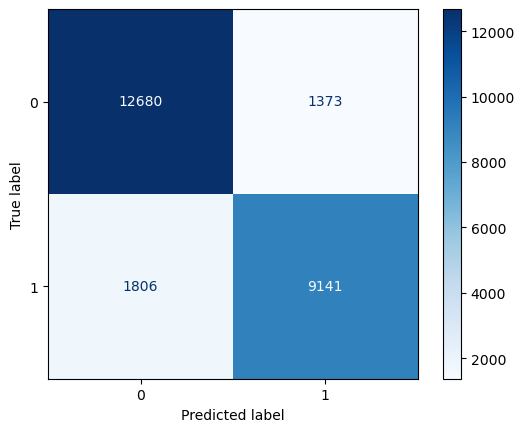

In [278]:
estimator_LG = LogisticRegression()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_LG)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f \n" % pipeline.score(X_test_final, y_test))
print('f1 score train set: %.3f' % f1_score(y_train, y_pred_train))
print('f1 score test set: %.3f \n' % f1_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [279]:
pred_df = pd.DataFrame({'y': y_test,'y_pred': y_pred_test})
pred_df

,y,y_pred
1,1,1
2,0,0
3,1,0
4,1,0
5,1,1
...,...,...
4996,1,0
4997,1,1
4998,0,0
4999,1,1


> Cross Validation

In [280]:
precision_LG_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_LG_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_LG_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_LG_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.86603774 0.8663227  0.87265738 0.88166828 0.86641221]
precision Score - Mean - Cross Validation :  0.8706196621519314
precision Score - Std - Cross Validation  :  0.0060561513571840055


berdasarkan hasil cross validation, model tersebut sudah konsisten dalam menghasilkan nilai precision yaitu stabil di 0.87

## K Neighbors Classifier

model score: 0.926
f1 score train set: 0.934
f1 score test set: 0.912 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     14053
           1       0.96      0.91      0.93     10947

    accuracy                           0.94     25000
   macro avg       0.95      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

Confusion Matrix      : 


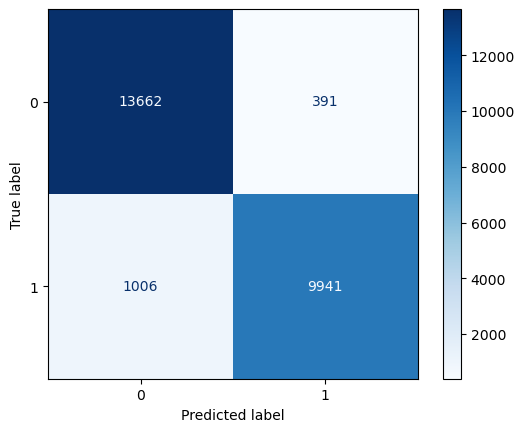

In [281]:
estimator_KNN = KNeighborsClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_KNN)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('f1 score train set: %.3f' % f1_score(y_train, y_pred_train))
print('f1 score test set: %.3f \n' % f1_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [282]:
precision_KNN_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_KNN_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_KNN_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_KNN_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.92474674 0.94305351 0.93976494 0.94660679 0.93451502]
precision Score - Mean - Cross Validation :  0.9377373987820548
precision Score - Std - Cross Validation  :  0.007618121071769304


pada KNN setelah dilakukan pengecekan melalui cross validation didapatkan bahwa nilai yang didapatkan tidak sesuai dengan hasil pemodelan awal atau dapat dianggap tidak konsisten. Namun perbedaannya tidak terpaut jauh sehingga masih di batas wajar

## Decision Tree Classifier

model score: 0.935
f1 score train set: 1.000
f1 score test set: 0.926 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14053
           1       1.00      1.00      1.00     10947

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix      : 


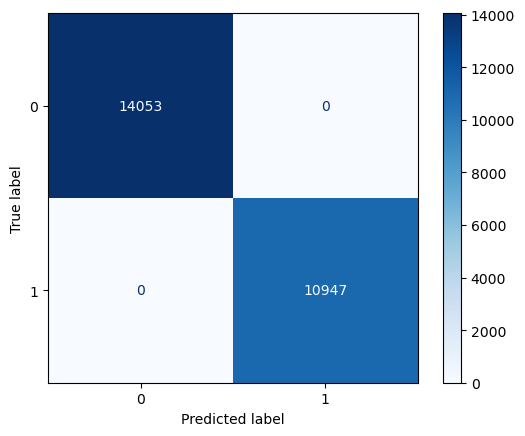

In [283]:
estimator_DT = DecisionTreeClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_DT)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('f1 score train set: %.3f' % f1_score(y_train, y_pred_train))
print('f1 score test set: %.3f \n' % f1_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [284]:
precision_DT_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_DT_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_DT_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_DT_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.92012635 0.91753512 0.92549745 0.92655889 0.92018349]
precision Score - Mean - Cross Validation :  0.9219802603815138
precision Score - Std - Cross Validation  :  0.0034571433085354526


pada decision tree setelah dilakukan pengecekan melalui cross validation didapatkan bahwa nilai yang didapatkan tidak sesuai dengan hasil pemodelan awal atau dapat dianggap tidak konsisten. Namun perbedaannya tidak terpaut jauh sehingga masih di batas wajar

## Random Forest Classifier

model score: 0.955
f1 score train set: 1.000
f1 score test set: 0.948 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14053
           1       1.00      1.00      1.00     10947

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix      : 


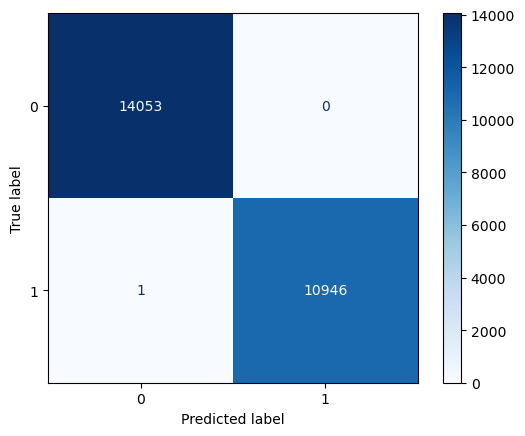

In [285]:
estimator_RF = RandomForestClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_RF)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('f1 score train set: %.3f' % f1_score(y_train, y_pred_train))
print('f1 score test set: %.3f \n' % f1_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [286]:
precision_RF_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_RF_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_RF_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_RF_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.95835283 0.95672406 0.96106942 0.96995708 0.96289338]
precision Score - Mean - Cross Validation :  0.9617993531753578
precision Score - Std - Cross Validation  :  0.004602507234478413


pada random forest pula setelah dilakukan pengecekan melalui cross validation didapatkan bahwa nilai yang didapatkan tidak sesuai dengan hasil pemodelan awal atau dapat dianggap tidak konsisten. Namun perbedaannya tidak terpaut jauh sehingga masih di batas wajar

## AdaBoost Classifier

model score: 0.928
f1 score train set: 0.915
f1 score test set: 0.918 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     14053
           1       0.92      0.91      0.91     10947

    accuracy                           0.93     25000
   macro avg       0.93      0.92      0.92     25000
weighted avg       0.93      0.93      0.93     25000

Confusion Matrix      : 


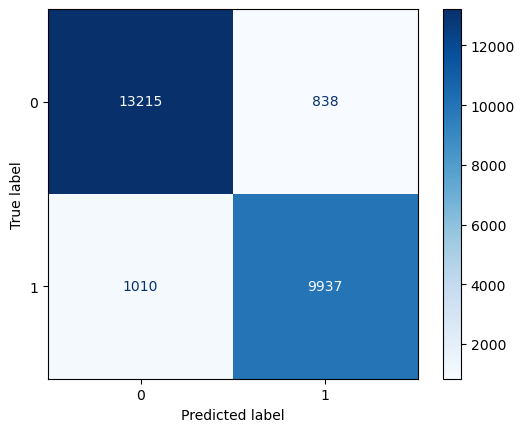

In [287]:
estimator_AB = AdaBoostClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_AB)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('f1 score train set: %.3f' % f1_score(y_train, y_pred_train))
print('f1 score test set: %.3f \n' % f1_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [288]:
precision_AB_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_AB_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_AB_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_AB_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.90863408 0.91979601 0.92091954 0.93661306 0.92207186]
precision Score - Mean - Cross Validation :  0.9216069100786914
precision Score - Std - Cross Validation  :  0.00891567999949385


setelah dilakukan cross validation didapatkan hasil yang konsisten yaitu di angka 0.92 sesuai dengan pemodelan awal yang telah dilakukan

## Gradient Boosting Classifier

model score: 0.942
f1 score train set: 0.932
f1 score test set: 0.933 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14053
           1       0.95      0.92      0.93     10947

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

Confusion Matrix      : 


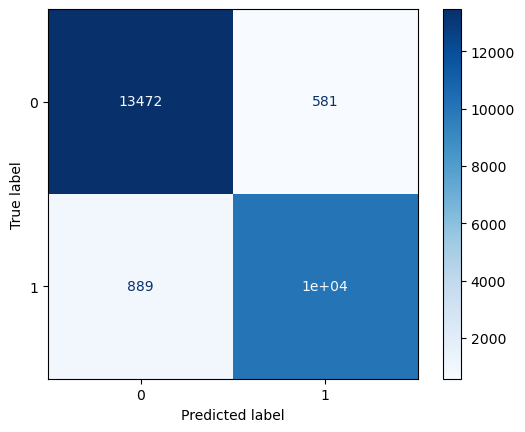

In [289]:
estimator_GB = GradientBoostingClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_GB)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('f1 score train set: %.3f' % f1_score(y_train, y_pred_train))
print('f1 score test set: %.3f \n' % f1_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [290]:
precision_GB_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_GB_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_GB_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_GB_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.93706294 0.94741784 0.94219925 0.95247148 0.93899578]
precision Score - Mean - Cross Validation :  0.9436294570158497
precision Score - Std - Cross Validation  :  0.005642144020201756


setelah dilakukan cross validation didapatkan hasil yang cukup konsisten yaitu di angka 0.94 walaupun belum sesuai dengan pemodelan awal yang telah dilakukan namun angka tersebut memiliki selisih yang sangat kecil yaitu hanya selisih 0,01

## **F1 Score Reports**

In [291]:
# Save Precision precision Report into a Dictionary

all_reports = {}
precision_reports = {
    'Logistic Regression'   : precision_LG_train_cross_val.mean(),
    'KNN'                   : precision_KNN_train_cross_val.mean(),
    'Decision Tree'         : precision_DT_train_cross_val.mean(),
    'Random Forest'         : precision_RF_train_cross_val.mean(),
    'Adaboost'              : precision_AB_train_cross_val.mean(),
    'Gradient Boosting'     : precision_GB_train_cross_val.mean()
}

all_reports['precision score mean'] = precision_reports
pd.DataFrame(all_reports)

,precision score mean
Adaboost,0.921607
Decision Tree,0.921980
Gradient Boosting,0.943629
KNN,0.937737
Logistic Regression,0.870620
Random Forest,0.961799


berdasarkan hasil cross validation, maka akan dipilih dari keenam model tersebut untuk dilakukan improvement model. sehingga berdasarkan perhitungan yang telah dilakukan, didapatkan hasil random forest sebagai model terbaik yang memiliki nilai precision yang paling tinggi.

# 7 - Tuning

In [223]:
estimator_RF = RandomForestClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_RF)
]

pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('clf', RandomForestClassifier())])

In [229]:
#Create a dictionary and fill out some parameters 
grid_params = dict(
    clf__criterion = ['gini', 'entropy', 'log_loss'],
    clf__max_depth = [int(x) for x in range(2,6)],
    clf__min_samples_split = [int(x) for x in range(2,6)],
    clf__min_samples_leaf = [int(x) for x in range(1,6)],
    clf__max_features = ['sqrt', 'log2', 'None']
)

In [230]:
RF_grid = GridSearchCV(pipeline,
                        grid_params,
                        verbose = 3,
                        refit = True,
                        scoring = 'f1',
                        cv = 5,
                        return_train_score = True,
                        n_jobs = -1)

RF_grid.fit(X_train_final, y_train)
RF_grid.best_params_    

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


{'clf__criterion': 'entropy',
 'clf__max_depth': 5,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 5}

In [232]:
print(RF_grid.best_estimator_)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        max_features='sqrt',
                              

In [233]:
RF_Grid_CV_best = RF_grid.best_estimator_   

In [234]:
y_pred_train_RF_tuned = RF_Grid_CV_best.predict(X_train_final)
y_pred_test_RF_tuned = RF_Grid_CV_best.predict(X_test_final)

F1 Score - Train Set   :  0.9106359395926662 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     14053
           1       0.92      0.90      0.91     10947

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000
 

Confusion Matrix      : 


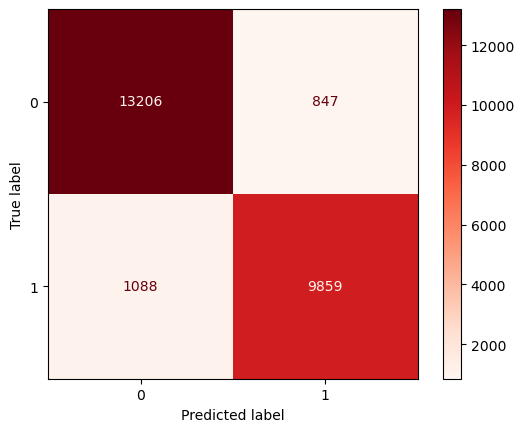

In [293]:
# Check Performance Model against Train-Set

print('Precision Score - Train Set   : ', precision_score(y_train, y_pred_train_RF_tuned), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_RF_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(RF_Grid_CV_best, X_train_final, y_train, cmap='Reds'))

> Classification Report

Precision 1: sebanyak 92% berhasil terprediksi sebagai pelanggan yang puas dan memang benar puas, namun sisanya 8% terprediksi sebagai pelanggan puas namun aslinya tidak puas atau biasa saja

> Confussion Matrix

- False Positive (FP): Model memprediksi 847 orang yang puas dengan layanan airlane, padahal kenyataan tidak puas atau biasa saja bayar.


Precision Score - Test Set   :  0.9202596198423737 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2815
           1       0.92      0.91      0.91      2185

    accuracy                           0.93      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.93      0.93      0.93      5000
 

Confusion Matrix      : 


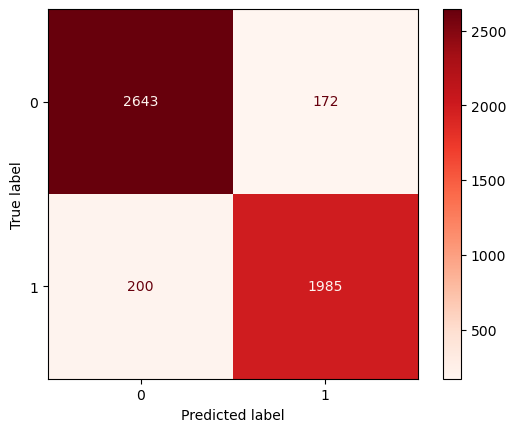

In [294]:
# Check Performance Model against test-Set

print('Precision Score - Test Set   : ', precision_score(y_test, y_pred_test_RF_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_RF_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(RF_Grid_CV_best, X_test_final, y_test, cmap='Reds'))

> Classification Report

Precision 1: sebanyak 92% berhasil terprediksi sebagai pelanggan yang puas dan memang benar puas, namun sisanya 8% terprediksi sebagai pelanggan puas namun aslinya tidak puas atau biasa saja

> Confussion Matrix

- False Positive (FP): Model memprediksi 172 orang yang puas dengan layanan airlane, padahal kenyataan tidak puas atau biasa saja bayar.


In [238]:
# for param in RF_grid.get_params().keys():
#     print(param)

cv
error_score
estimator__memory
estimator__steps
estimator__verbose
estimator__preprocess
estimator__clf
estimator__preprocess__n_jobs
estimator__preprocess__remainder
estimator__preprocess__sparse_threshold
estimator__preprocess__transformer_weights
estimator__preprocess__transformers
estimator__preprocess__verbose
estimator__preprocess__verbose_feature_names_out
estimator__preprocess__onehotencoder
estimator__preprocess__minmaxscaler
estimator__preprocess__onehotencoder__categories
estimator__preprocess__onehotencoder__drop
estimator__preprocess__onehotencoder__dtype
estimator__preprocess__onehotencoder__handle_unknown
estimator__preprocess__onehotencoder__sparse
estimator__preprocess__minmaxscaler__clip
estimator__preprocess__minmaxscaler__copy
estimator__preprocess__minmaxscaler__feature_range
estimator__clf__bootstrap
estimator__clf__ccp_alpha
estimator__clf__class_weight
estimator__clf__criterion
estimator__clf__max_depth
estimator__clf__max_features
estimator__clf__max_leaf_nod

In [302]:
RF_Best = RandomForestClassifier(criterion='entropy', 
                                 max_depth=5,
                                 max_features='sqrt', 
                                 min_samples_split=5)

# 8 - Model Evaluation

1. Berdasarkan hasil cross validation, didapatkan hasil precision yang paling baik oleh base model Random Forest
2. Setelah didapatkan hasil cross validation, maka dilakukan hyperparameter tuning pada model Random Forest dan didapatkan parameter terbaik yang mendapatkan nilai precision sebesar 91% pada data train dan 92% pada data test

# 9 - Model Saving

In [300]:
# Save the Files

with open('random_forest.pkl', 'wb') as file_1:
  pickle.dump(RF_Best, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(Scaler, file_2)

with open('model_encode.pkl', 'wb') as file_2:
  pickle.dump(OneHot, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('list_cat_nom.txt','w') as file_4: 
  json.dump(cat_nominal, file_4)

with open('list_cat_ord.txt','w') as file_5: 
  json.dump(cat_ordinal, file_5)

# Kesimpulan

> Based on EDA

1. Dataset didominasi oleh data categoric ordinal
2. Berdasarkan uji normalitas shapiro test, didapatkan terdapat kolom munerik yang terdistribusi normal yaitu kolom `Arrival Delay in Minutes` dan tidak terdistribusi normal yaitu kolom `Age`, `Flight Distance`, `Departure Delay in Minutes`

> Model Evaluation

1. Model yang dipilih adalah Random Forest dengan menadapatkan nilai precision yang paling tinggi dibandingkan dengan model lainnya yang telah dilakukan modelling
2. Hasil precision sudah cukup baik pada data train dan data test, pada data train didapatkan nilai precisoin sebesar 91% dan data test sebesar 92%
3. Oleh karena itu Random Forest dapat melakukan klasifikasi yang lebih baik jika dibandingkan dengan model lainnya.
4. Evaluasi model menggunakan precision guna mengurangi pelanggan yang terprediksi puas namun kenyataannya tidak puas atau netral

> Futher Improvement:

1. Perlu dilakukan pengurangin dimensi yang lebih optimal seperti menggunakan chi-square untuk memilah feature-feature yang penting agar tidak memakan waktu untuk melakukan pemodelan
2. Perusahaan Airlane perlu melakukan crosscheck ulang terhdap pelanggannya yang terprediksi tidak puas atau biasa saja padahal kenyataan mereka pelanggan yang puas